In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('./data/salary-data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
x=data['YearsExperience']  # features
y= data['Salary']          # target

In [6]:
type(x)

pandas.core.series.Series

In [7]:
x=data[['YearsExperience']] # x should always be a 2d input

In [8]:
type(x)

pandas.core.frame.DataFrame

In [9]:
x.shape

(30, 1)

In [10]:
y.shape

(30,)

In [11]:
type(y)

pandas.core.series.Series

In [12]:
# split the data into train and test
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain , ytest = train_test_split(x,y,train_size=0.8 ,random_state=1)

In [13]:
xtest

,YearsExperience
17,5.3
21,7.1
10,3.9
19,6.0
14,4.5
20,6.8


In [14]:
#build the model
from sklearn.linear_model import LinearRegression
model =LinearRegression()

In [15]:
#fit the model
model.fit(xtrain , ytrain)

LinearRegression()

In [16]:
# testing ---predicting
ypred = model.predict(xtest)

In [17]:
# compare y test and y pred 

In [18]:
 ytest.values

array([83088., 98273., 63218., 93940., 61111., 91738.])

In [19]:
ypred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [20]:
type(ypred)

numpy.ndarray

In [21]:
#calculate the accuracy using R2
from sklearn.metrics import r2_score

In [22]:
r2result = r2_score(ytest, ypred)
print(r2result)
''''The R-squared may need to be above 0.95 for a regression model 
to be considered reliable.'''

0.7616681465472094


"'The R-squared may need to be above 0.95 for a regression model \nto be considered reliable."

In [23]:
#plot line of regression for training samples

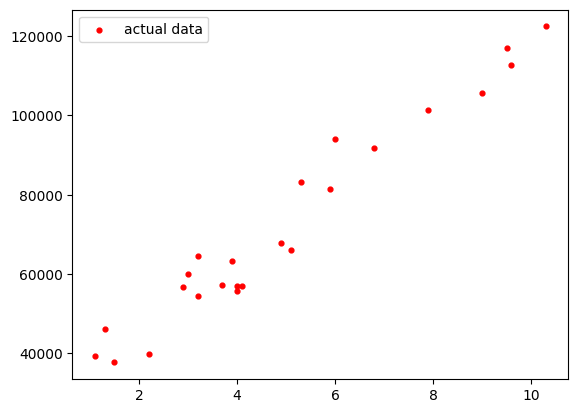

In [42]:
plt.scatter(xtrain,ytrain,color='red',s=12,label='actual data')
plt.legend()
plt.show()

In [25]:
# all in one graph

In [26]:
# line of regression for predicted data

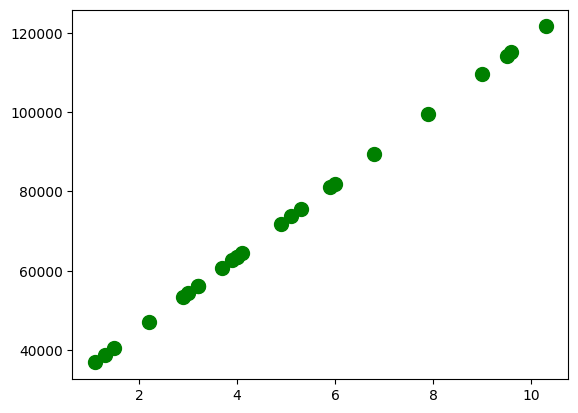

In [44]:

ypred_xtrain = model.predict(xtrain)
plt.scatter(xtrain, ypred_xtrain ,color ='green',s=100 ,label='predicted data')
plt.show()

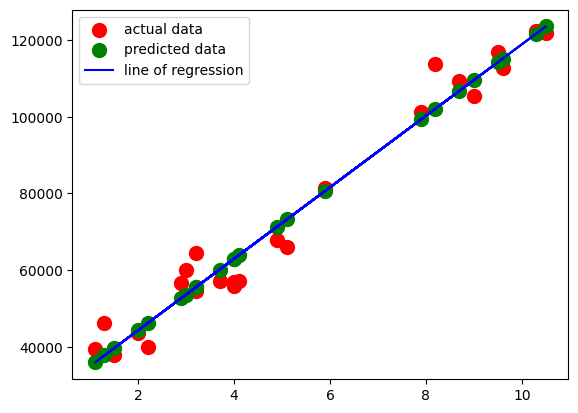

In [28]:
plt.scatter(xtrain,ytrain,color='red',s=100,label='actual data')
plt.scatter(xtrain, ypred_xtrain ,color ='green',s=100 ,label='predicted data')
plt.plot(xtrain,ypred_xtrain,color='blue',label='line of regression')

plt.legend()
plt.show()

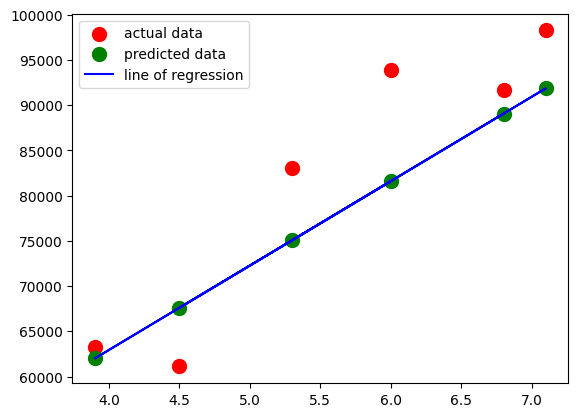

In [29]:
# line of regresssion for testing sample
ypred_xtest = model.predict(xtest)
plt.scatter(xtest,ytest,color='red',s=100 , label='actual data')
plt.scatter(xtest , ypred_xtest,color='green',s=100, label='predicted data')
plt.plot(xtest,ypred_xtest, color='blue',label='line of regression')
plt.legend()
plt.show()


In [30]:
#calculating m and c of y=mx+c , m is slope or coeffecient and c is y intercept
m=model.coef_
c=model.intercept_
print(m,c)

[9332.94473799] 25609.89799835482


In [31]:
# changing the accuracy of the prediction
#xtrain , xtest, ytrain , ytest = train_test_split(x,y,train_size=0.8 ,random_state=0)
# in this command change the random_state to either 1,2,3 and check the result

# the above step can be automated by passing a huge value to random state and fetch the accuracy % to a list

In [32]:
# create a list to fetch the accuracy result
accuracy_list=[]
for i in range(1000):
    xtrain,xtest, ytrain , ytest = train_test_split(x,y,train_size=0.8 ,random_state=i)
    model =LinearRegression()
    model.fit(xtrain , ytrain)
    ypred = model.predict(xtest)
    r2result = r2_score(ytest, ypred)
    accuracy_list.append(r2result)


In [33]:
print(accuracy_list)

[0.988169515729126, 0.7616681465472094, 0.8886956733784565, 0.9695039421049821, 0.9504404484884267, 0.9439628569611375, 0.9368146227107088, 0.8143022783109006, 0.9631182154839476, 0.9388416537799072, 0.9816423482070253, 0.940882728477622, 0.9429269163491423, 0.9394460269118793, 0.9606215790278543, 0.8697012433817218, 0.7949890249259297, 0.9384744808306155, 0.8864330645841889, 0.9415531751862448, 0.9441299149555877, 0.9398582853702572, 0.8870702615446783, 0.9184170849214232, 0.9520702017424296, 0.9531732818427658, 0.9835849730044816, 0.9636425773684423, 0.9217841352107623, 0.9467172742609803, 0.9944092048209745, 0.8967649524853984, 0.8985995727228404, 0.9350785573211586, 0.9244141448042442, 0.8839476512584652, 0.955021106900739, 0.9778242092591888, 0.972479448737762, 0.9928344802911048, 0.7775083459037235, 0.9802519469633169, 0.9024461774180497, 0.8688045158887867, 0.934951117043928, 0.9250487875802145, 0.9789129767378081, 0.9839919389056401, 0.980277279178695, 0.9497670285223545, 0.882

In [34]:
np.max(accuracy_list)

np.float64(0.9969626143077172)

In [35]:
# to find the index of the max value
np.argmax(accuracy_list)

np.int64(543)

In [36]:
# to save this model and test anyday anytime
# this model needs to be saved to a file
import joblib
joblib.dump(model , './models/salary.pkl')

['./models/salary.pkl']

In [37]:
# how to use the saved model later
# first load the model to your environment
mymodel = joblib.load('./models/salary.pkl' )

In [38]:
# after loading the model , use the loaded model to predict the salary gor the given ip experience, 
#ip should be given in 2d array , as we know x should be given in 2d
mymodel.predict([[11]])

c:\Users\supri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128042.47966025])

In [39]:
# to check the exp for ,multiple inputs use array if list
mymodel.predict([[10],[11],[12]])

c:\Users\supri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118832.63411185, 128042.47966025, 137252.32520864])